In [24]:
import tensorflow as tf
import pandas as pd

from FeedBack import FeedBack
from window import WindowGenerator
import utils

# Autoregressive (AR) LSTM

## Dataset

In [25]:
case_1 = pd.read_csv("../datasets/case_1.csv")
case_2 = pd.read_csv("../datasets/case_2.csv")
case_3 = pd.read_csv("../datasets/case_3.csv")
case_4 = pd.read_csv("../datasets/case_4.csv")
case_5 = pd.read_csv("../datasets/case_5.csv")

In [26]:
outlets = [ col for col in case_1.columns.values if col.startswith('outlet') ]
label_columns = outlets
feature_count = len(case_1.columns)

In [27]:
column_indices = { name: i for i, name in enumerate(case_1.columns) }

## Train case function

In [28]:
def train_case(case_df:pd.DataFrame, model:FeedBack, in_width:int, out_steps:int, max_epochs:int):
    """ Train model for given case df. """

    outlets = [ col for col in case_df.columns.values if col.startswith('outlet') ]
    column_indices = { name: i for i, name in enumerate(case_df.columns) }

    train_df, test_df, val_df = utils.train_test_val_split(case_df)
    # train_df, test_df, val_df = normalize_datasets(train_df, test_df, val_df)

    label_columns = outlets

    multi_window = WindowGenerator(
        train_df=train_df,
        val_df=val_df,
        test_df=test_df,
        input_width=in_width,
        label_width=out_steps,
        shift=out_steps,
        # label_columns=label_columns
    )

    history = model.fit(
        multi_window.train,
        epochs=max_epochs,
        validation_data=multi_window.val,
        verbose=0
        # callbacks=[early_stopping]
    )

    return multi_window, history

## Model creation

In [29]:
IN_WIDTH = 8
OUT_STEPS = 8
MAX_EPOCHS = 100
features_size = len(label_columns)

In [30]:
feedback_model = FeedBack(units=32, out_steps=OUT_STEPS, num_features=feature_count)

In [31]:
feedback_model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.RootMeanSquaredError()])

## Case 2

In [32]:
window, history = train_case(
    case_df=case_2,
    model=feedback_model,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS
)

2022-09-08 14:43:15.597996: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-09-08 14:43:17.402518: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [33]:
feedback_model.build(input_shape=window.example[0].shape)
feedback_model.summary()

Model: "feed_back_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_cell_1 (LSTMCell)      multiple                  39040     
                                                                 
 rnn_1 (RNN)                 multiple                  39040     
                                                                 
 dense_1 (Dense)             multiple                  8976      
                                                                 
Total params: 48,016
Trainable params: 48,016
Non-trainable params: 0
_________________________________________________________________


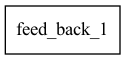

In [34]:
tf.keras.utils.plot_model(feedback_model, "../plots/models/feedback_model.png", show_shapes=True)

2022-09-08 14:44:05.919381: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


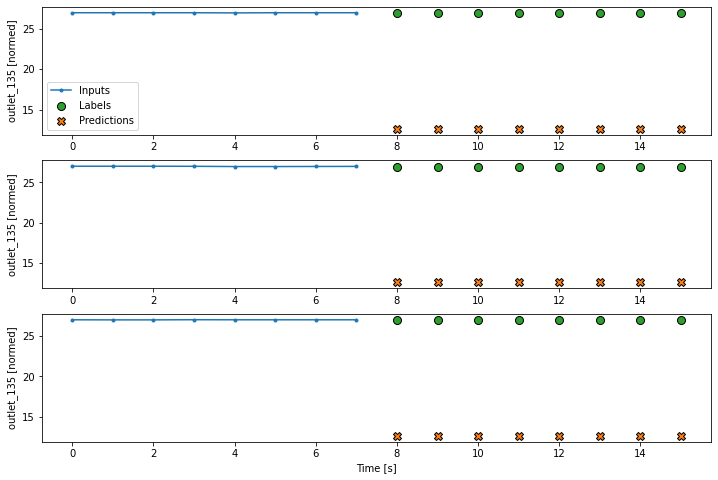

In [35]:
window.plot(feedback_model, plot_col="outlet_135")

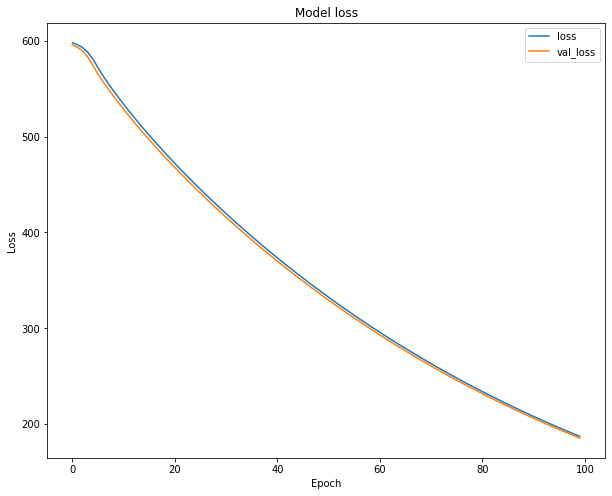

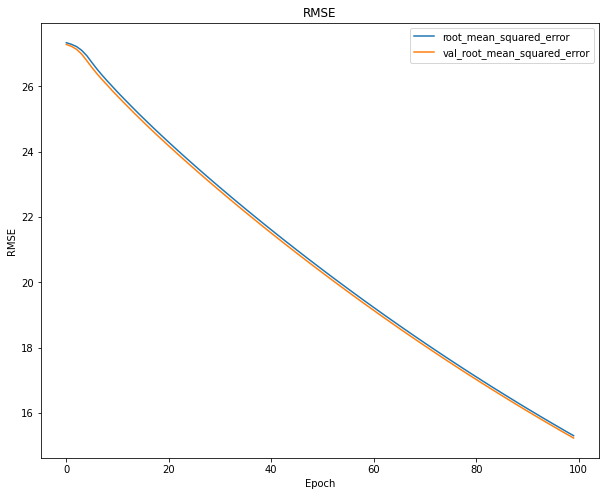

In [36]:
utils.plot_losses(history=history)

## Case 3

In [37]:
window, history = train_case(
    case_df=case_3,
    model=feedback_model,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS
)

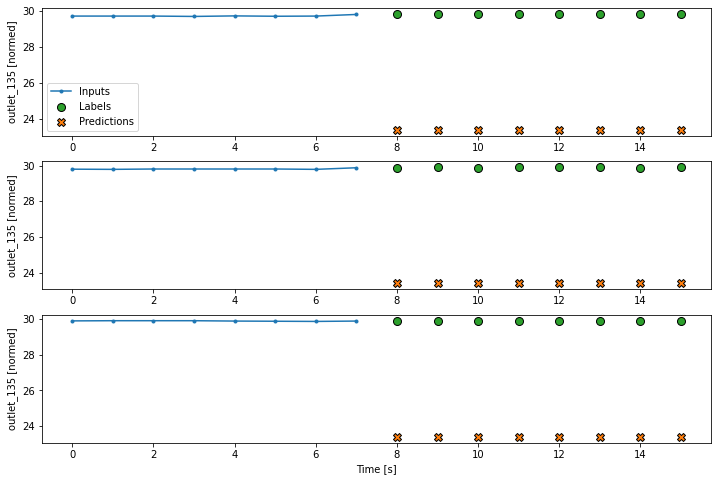

In [38]:
window.plot(feedback_model, plot_col="outlet_135")

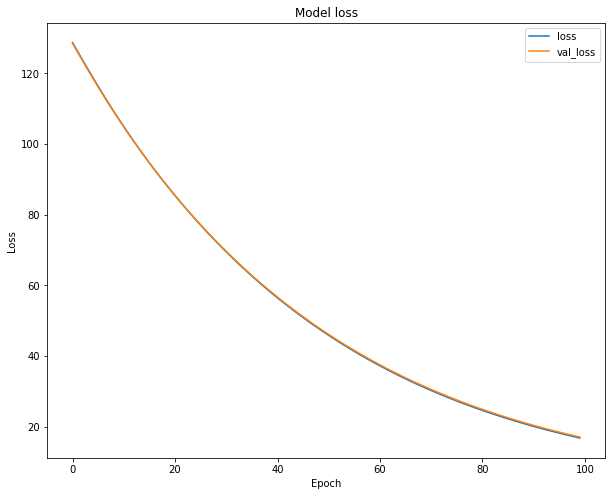

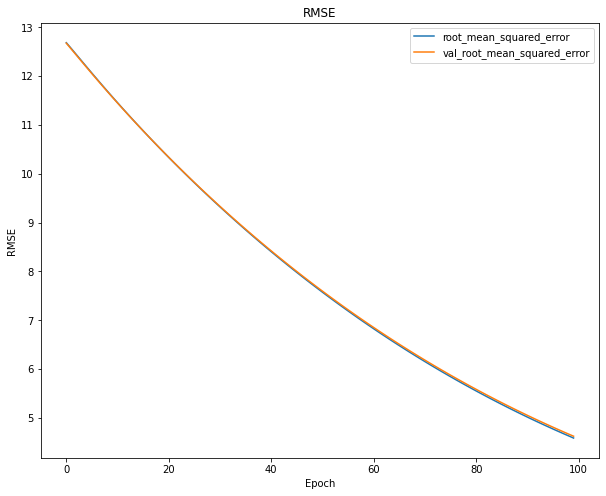

In [39]:
utils.plot_losses(history=history)

## Case 4

In [40]:
window, history = train_case(
    case_df=case_4,
    model=feedback_model,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS
)

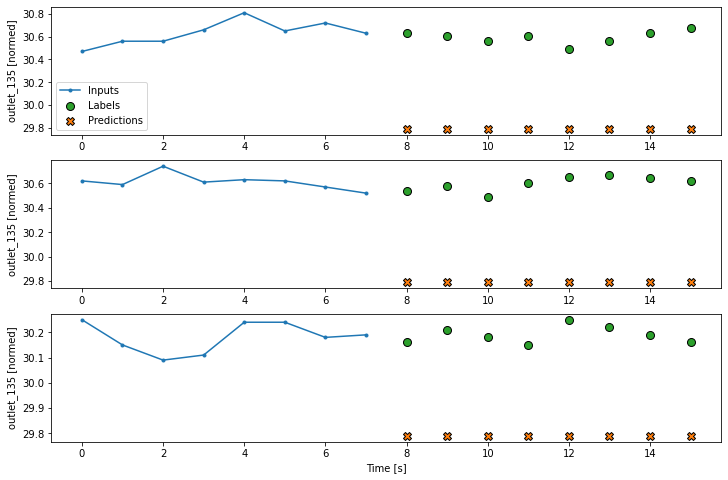

In [41]:
window.plot(feedback_model, plot_col="outlet_135")

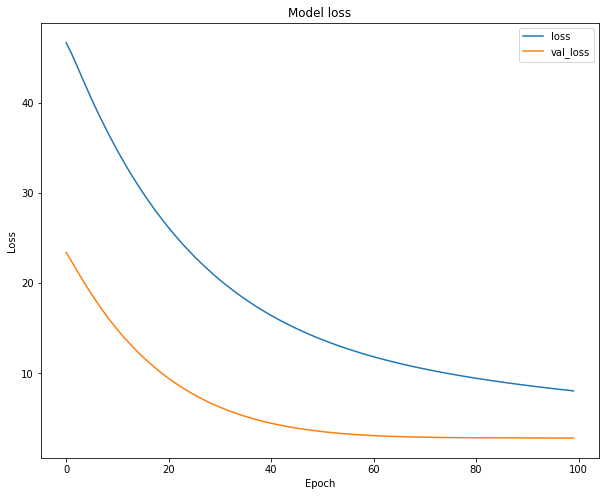

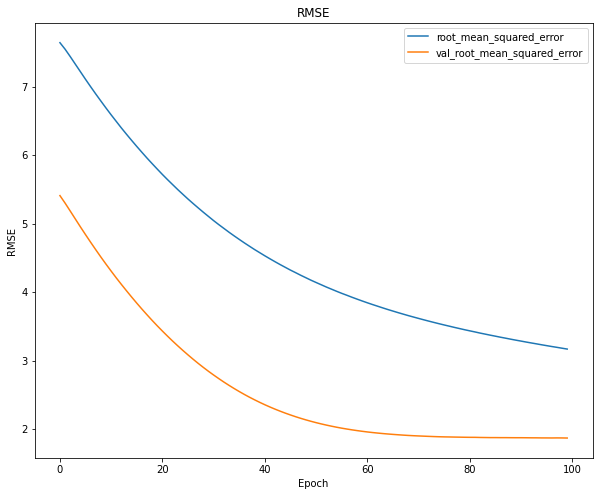

In [42]:
utils.plot_losses(history=history)

## Case 5

In [43]:
window, history = train_case(
    case_df=case_5,
    model=feedback_model,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS
)

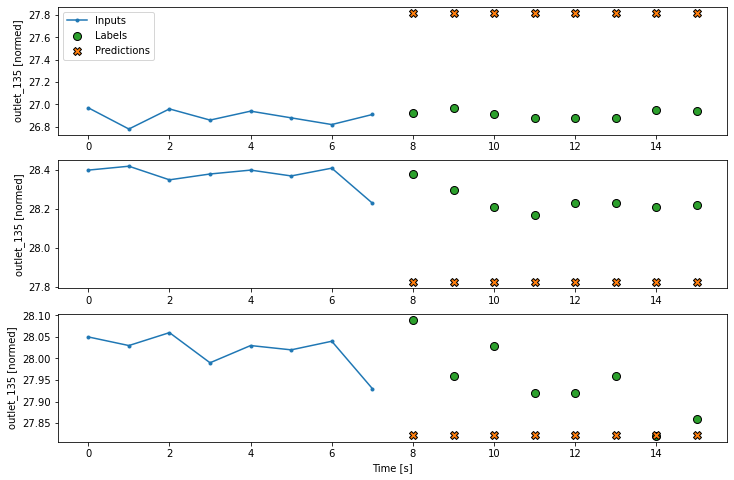

In [44]:
window.plot(feedback_model, plot_col="outlet_135")

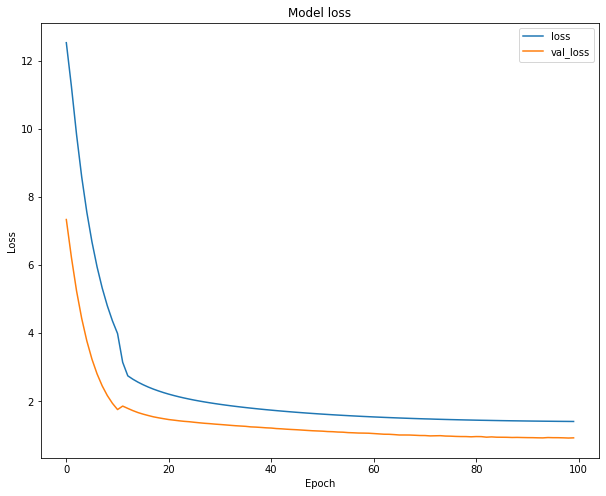

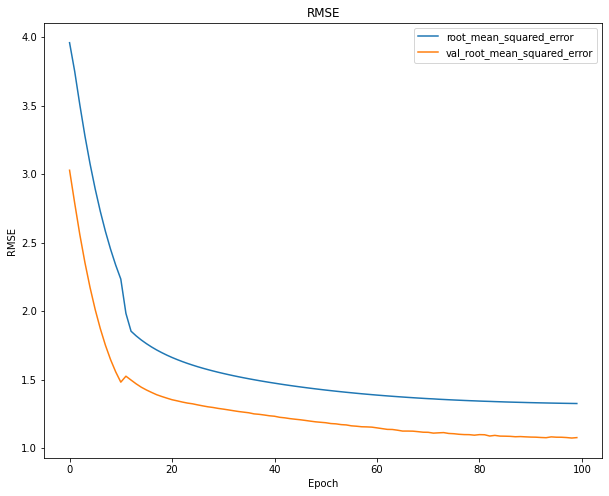

In [45]:
utils.plot_losses(history=history)

## Case 1 (Testing)

In [46]:
outlets = [ col for col in case_1.columns.values if col.startswith('outlet') ]
column_indices = { name: i for i, name in enumerate(case_1.columns) }

label_columns = outlets

window = WindowGenerator(
    train_df=case_1,
    input_width=IN_WIDTH,
    label_width=OUT_STEPS,
    shift=OUT_STEPS,
    # label_columns=label_columns
)

feedback_model.evaluate(window.train) # Testing

6/6 [==============================] - 0s 52ms/step - loss: 56.8028 - root_mean_squared_error: 8.4264


[56.80281066894531, 8.426377296447754]